# Pandas: Using the `apply` function


### BASIC LEVEL


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
imdb_1000_data_url = '../../data/imdb_1000.csv'
movies = pd.read_csv(imdb_1000_data_url)

In [5]:
# check the number of rows and columns
movies.shape

(979, 6)

In [6]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [7]:
# calculate the average movie duration
movies['duration'].mean()

120.97957099080695

In [8]:
# sort the DataFrame by duration to find the shortest and longest movies
movies.sort_values('duration').head(1)
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


<AxesSubplot:ylabel='Frequency'>

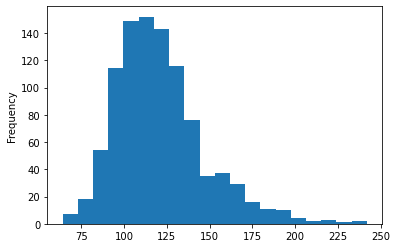

In [9]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies['duration'].plot(kind='hist', bins=20)

<AxesSubplot:>

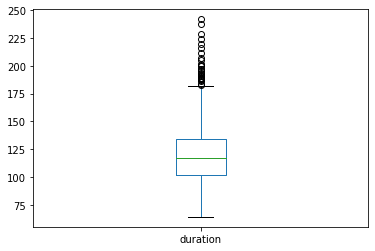

In [10]:
# use a box plot to display that same data
movies['duration'].plot(kind='box')

In [24]:
# create a function based on `duration`
def movie_size(row):
    if row > 120:
        return 'long'
    else:
        return 'short'

In [26]:
# use "apply"
movies['size'] = movies['duration'].apply(movie_size)
movies['size'].value_counts()

short    543
long     436
Name: size, dtype: int64

In [36]:
pd.crosstab(movies['size'], movies['star_rating'])

star_rating,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.2,9.3
size,,,,,,,,,,,,,,,,,,,,
long,12,42,52,47,50,27,42,47,27,28,21,15,3,9,5,5,1,1,1,1
short,37,66,72,66,66,48,55,56,24,15,16,8,12,1,0,1,0,0,0,0


In [47]:
# create a function based on two variables
def movie_size(row):
    if row['duration'] < 120:
        if row['star_rating']<7.8:
            return 'short & interesting'
        else:
            return 'short & boring'
    elif row['duration'] >= 120:
        if row['star_rating']<=7.8:
            return 'long & interesting'
        else:
            return 'long & boring'

In [48]:
# use "apply" with two columns (notice the use of "axis")

movies['wanna_watch'] = movies.apply(movie_size, axis=1)
movies['wanna_watch'].value_counts()

short & boring         290
long & boring          241
short & interesting    235
long & interesting     213
Name: wanna_watch, dtype: int64

### INTERMEDIATE LEVEL


In [12]:
# count how many movies have each of the content ratings
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

Text(0, 0.5, 'Number of Movies')

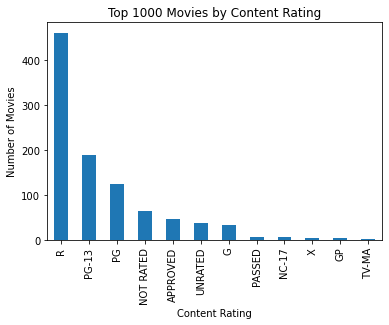

In [13]:
# use a visualization to display that same data, including a title and x and y labels
movies['content_rating'].value_counts().plot(kind='bar', title='Top 1000 Movies by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')

In [14]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

In [15]:
# convert the following content ratings to "NC-17": X, TV-MA
movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17', inplace=True)

In [16]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [17]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies['content_rating'].isnull()]
movies['content_rating'].fillna('UNRATED', inplace=True)

In [18]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
movies[movies['duration'] >= 120]['star_rating'].mean()
movies[movies['duration'] < 120]['star_rating'].mean()

7.838666666666657

<AxesSubplot:xlabel='duration', ylabel='star_rating'>

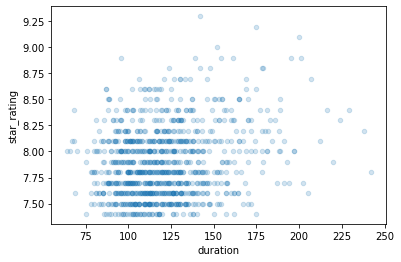

In [19]:
# use a visualization to detect whether there is a relationship between duration and star rating
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.2)

In [49]:
# calculate the average duration for each genre
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

### ADVANCED LEVEL


array([[<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'NC-17'}>],
       [<AxesSubplot:title={'center':'PG'}>,
        <AxesSubplot:title={'center':'PG-13'}>],
       [<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'UNRATED'}>]], dtype=object)

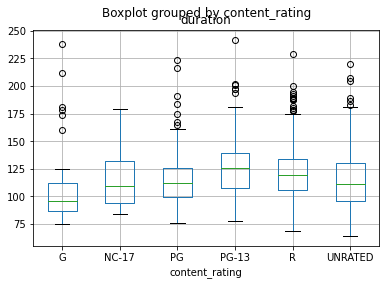

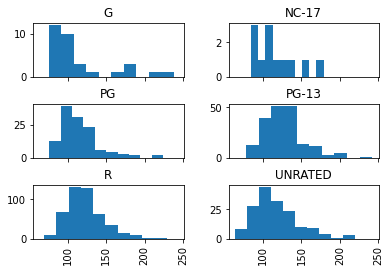

In [22]:
# visualize the relationship between content rating and duration
movies.boxplot(column='duration', by='content_rating')
movies.hist(column='duration', by='content_rating', sharex=True)

In [50]:
# determine the top rated movie (by star rating) for each genre
movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()
movies.groupby('genre')['title'].first()   # equivalent, since DataFrame is already sorted by star rating

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

In [24]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
dupe_titles = movies[movies['title'].duplicated()].title
movies[movies['title'].isin(dupe_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [25]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
genre_counts=movies.groupby('genre')['genre'].count()
big_genre=list(genre_counts[genre_counts>10].index)
movies.loc[movies['genre'].isin(big_genre)].groupby('genre').mean().sort_values('star_rating')

,star_rating,duration
genre,,
Horror,7.806897,102.517241
Comedy,7.822436,107.602564
Biography,7.862338,131.844156
Action,7.884559,126.485294
Drama,7.902518,126.539568
Animation,7.914516,96.596774
Crime,7.916935,122.298387
Adventure,7.933333,134.840000
Mystery,7.975000,115.625000


In [26]:
# option 1: manually create a list of relevant genres, then filter using that list
movies['genre'].value_counts()
top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies['genre'].isin(top_genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [27]:
# option 2: automatically create a list of relevant genres by saving the value_counts and then filtering
genre_counts = movies['genre'].value_counts()
top_genres = genre_counts[genre_counts >= 10].index
movies[movies['genre'].isin(top_genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [28]:
# option 3: calculate the average star rating for all genres, then filter using a boolean Series
movies.groupby('genre')['star_rating'].mean()[movies['genre'].value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [29]:
# option 4: aggregate by count and mean, then filter using the count
genre_ratings = movies.groupby('genre')['star_rating'].agg(['count', 'mean'])
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


### using `apply` to discover actors

In [31]:
# Let's display a list of movies that include Marlon Brando.
movies.loc[movies['actors_list'].str.contains('Marlon Brando')]

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
51,8.5,Apocalypse Now,R,Drama,153,"[u'Martin Sheen', u'Marlon Brando', u'Robert D..."
122,8.3,On the Waterfront,UNRATED,Crime,108,"[u'Marlon Brando', u'Karl Malden', u'Lee J. Co..."
284,8.1,A Streetcar Named Desire,PG,Drama,122,"[u'Vivien Leigh', u'Marlon Brando', u'Kim Hunt..."


In [32]:
# How many movies is Samuel Jackson in?
len(movies.loc[movies['actors_list'].str.contains('Samuel L. Jackson')])

6

In [33]:
# Let's explore a little further.
print(movies.iloc[0]['actors_list'])
# That 'u' is part of the external representation of the string, 
# meaning it's a Unicode string as opposed to a byte string. 

# Let's take a look at the first row of the dataframe, and break up that string of actors into its parts.
line = movies.iloc[0]['actors_list']
import re
line = re.sub("u'", "'", line)
line = re.sub("'", "", line)
line = re.sub('\[', "", line)
line = re.sub("\]", "", line)
actors_list=line.split(', ')
print(actors_list)
print(len(actors_list))
print(actors_list[0])

[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']
['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']
3
Tim Robbins


In [34]:
# Now let's write a function that displays all the actors in a clean list.
import re
def actors_cleanlist(row):
    line = row['actors_list']   
    line = re.sub("u'", "'", line)
    line = re.sub("'", "", line)
    line = re.sub('\[', "", line)
    line = re.sub("\]", "", line)
    actors_list=line.split(', ')
    return(actors_list)
actors_cleanlist(movies.iloc[0])

['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']

In [35]:
# Let's create a new column with that list.
movies['cleanlist']=movies.apply(actors_cleanlist, axis=1)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,cleanlist
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...","[Tim Robbins, Morgan Freeman, Bob Gunton]"
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']","[Marlon Brando, Al Pacino, James Caan]"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","[Al Pacino, Robert De Niro, Robert Duvall]"
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...","[Christian Bale, Heath Ledger, Aaron Eckhart]"
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....","[John Travolta, Uma Thurman, Samuel L. Jackson]"


In [36]:
# Okay, let's create columns for actors 1, 2, and 3
movies['actor_0']=movies['cleanlist'].apply(lambda row: row[0])
movies['actor_1']=movies['cleanlist'].apply(lambda row: row[1])
movies['actor_2']=movies['cleanlist'].apply(lambda row: row[2])
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,cleanlist,actor_0,actor_1,actor_2
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...","[Tim Robbins, Morgan Freeman, Bob Gunton]",Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']","[Marlon Brando, Al Pacino, James Caan]",Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...","[Al Pacino, Robert De Niro, Robert Duvall]",Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...","[Christian Bale, Heath Ledger, Aaron Eckhart]",Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....","[John Travolta, Uma Thurman, Samuel L. Jackson]",John Travolta,Uma Thurman,Samuel L. Jackson


In [37]:
# Okay, who's the most frequent lead actor?
movies['actor_0'].value_counts().head()

Robert De Niro    13
Tom Hanks         12
Clint Eastwood    11
Al Pacino         10
Johnny Depp       10
Name: actor_0, dtype: int64

In [38]:
# Who are the most frequent supporting actors?
print(movies['actor_1'].value_counts().head())
print('\n')
print(movies['actor_2'].value_counts().head())

Emma Watson      7
Kate Winslet     6
Matt Damon       6
Geoffrey Rush    5
Ian McKellen     4
Name: actor_1, dtype: int64


Rupert Grint          6
Scarlett Johansson    5
Julianne Moore        4
Carrie Fisher         4
Ed Harris             4
Name: actor_2, dtype: int64
